In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
from sklearn.cluster import KMeans

working_directory = os.getcwd()
print(working_directory)

d:\Workspace\Python_visual_data


In [52]:
path = working_directory + '/address_grades.csv'
path1 = working_directory + '/basic.csv'

df_address = pd.read_csv(path)
df_basic = pd.read_csv(path1)

In [53]:
df_address["price"] = df_address["zpid"].to_frame().merge(df_basic, how='left').price

In [13]:
df_address.head()

,Unnamed: 0,streetAddress,postalCode,latitude,longitude,state,zpid,price
0,0,9539 Clatsop Dr,80925,38.731670,-104.650375,co,247509225,"$399,000"
1,1,1722 N Chelton Rd,80909,38.857857,-104.765690,co,13602165,"$345,000"
2,2,6530 Burrows Rd,80908,39.003345,-104.705910,co,13535937,"$535,000"
3,3,18202 E Nassau Drive,80013,39.642790,-104.775980,co,13097640,"$499,983"
4,4,8495 Rain Dance Ct,80920,38.955364,-104.756096,co,13561330,"$470,000"


In [54]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1778 non-null   int64  
 1   streetAddress  1778 non-null   object 
 2   postalCode     1778 non-null   int64  
 3   latitude       1778 non-null   float64
 4   longitude      1778 non-null   float64
 5   state          1778 non-null   object 
 6   zpid           1778 non-null   int64  
 7   price          1751 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 111.2+ KB


In [55]:
df_address['price'] = df_address['price'].astype('string')

In [69]:
df_address['price'] = df_address['price'].str.lstrip('$')
df_address['price'] = df_address['price'].str.lstrip(',')
df_address['price'] = df_address['price'].str.replace(',','')
df_address['price'] = df_address['price'].astype('float')

In [67]:
df_address.head()

,Unnamed: 0,streetAddress,postalCode,latitude,longitude,state,zpid,price
0,0,9539 Clatsop Dr,80925,38.731670,-104.650375,co,247509225,399000
1,1,1722 N Chelton Rd,80909,38.857857,-104.765690,co,13602165,345000
2,2,6530 Burrows Rd,80908,39.003345,-104.705910,co,13535937,535000
3,3,18202 E Nassau Drive,80013,39.642790,-104.775980,co,13097640,499983
4,4,8495 Rain Dance Ct,80920,38.955364,-104.756096,co,13561330,470000


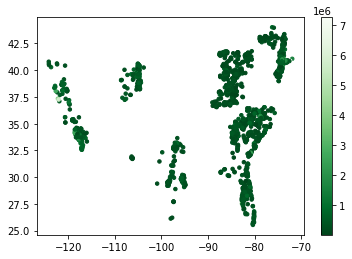

In [90]:
plt.scatter(df_address.longitude, df_address.latitude, s=12 , c=df_address.price, cmap='Greens_r')
plt.colorbar()

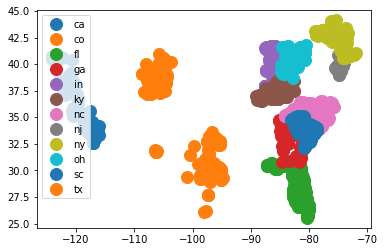

In [82]:
groups = df_address.groupby('state')
for name, group in groups:
    plt.plot(group.longitude, group.latitude, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

[[-101.32319933   34.91667345]
 [ -81.20097885   36.95173126]
 [-118.84630797   35.27679327]]


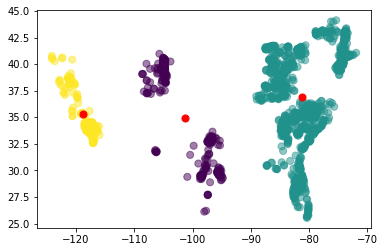

In [92]:
from sklearn.cluster import KMeans

  
df_address1 = pd.DataFrame(df_address, columns=['longitude', 'latitude'])
  
kmeans = KMeans(n_clusters=3).fit(df_address1)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_address1['longitude'], df_address1['latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()